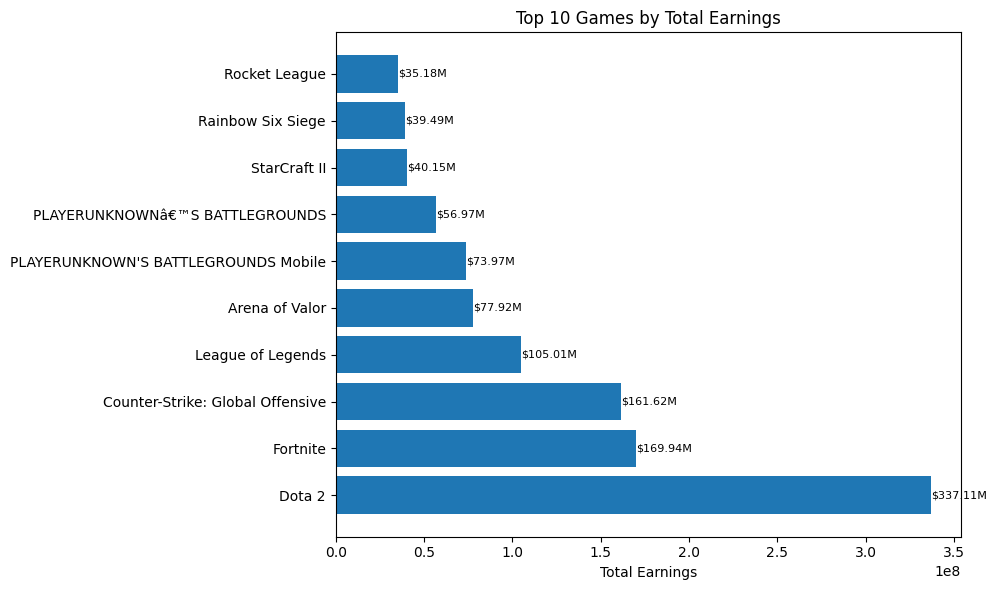

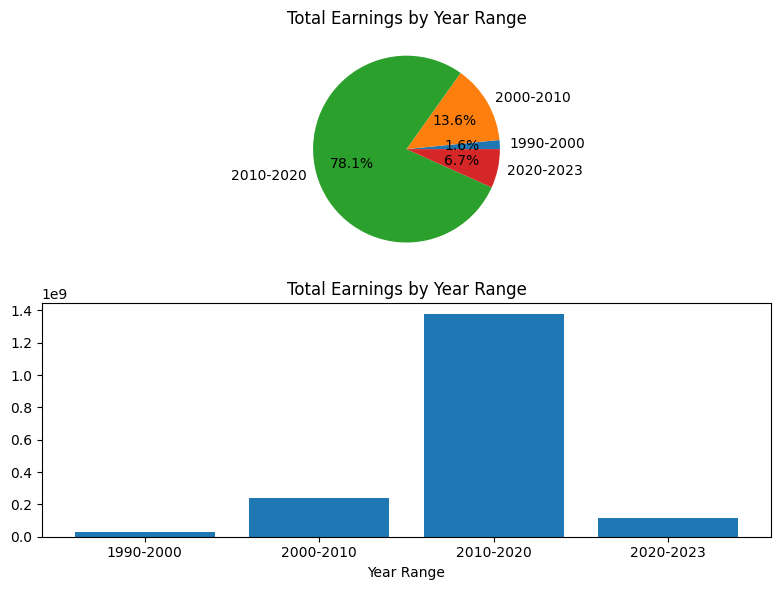

Game: Dota 2
Total Earnings: 337107974.16
Earnings by Year:
  Year: 2013
  Earnings: 337107974.16
--------------------
Game: Fortnite
Total Earnings: 169935795.99
Earnings by Year:
  Year: 2017
  Earnings: 169935795.99
--------------------
Game: Counter-Strike: Global Offensive
Total Earnings: 161615824.69
Earnings by Year:
  Year: 2012
  Earnings: 161615824.69
--------------------
Game: League of Legends
Total Earnings: 105011055.56
Earnings by Year:
  Year: 2009
  Earnings: 105011055.56
--------------------
Game: Arena of Valor
Total Earnings: 77920901.06
Earnings by Year:
  Year: 2015
  Earnings: 77920901.06
--------------------
Game: PLAYERUNKNOWN'S BATTLEGROUNDS Mobile
Total Earnings: 73971090.93
Earnings by Year:
  Year: 2017
  Earnings: 73971090.93
--------------------
Game: PLAYERUNKNOWNâ€™S BATTLEGROUNDS
Total Earnings: 56968205.8
Earnings by Year:
  Year: 2017
  Earnings: 56968205.8
--------------------
Game: StarCraft II
Total Earnings: 40148652.88
Earnings by Year:
  Year: 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file into a DataFrame
df = pd.read_csv('GeneralEsportData.csv')

# Explore top games by total earnings
filtered_df = df[df['TotalEarnings'] > 10000000]
sorted_df = filtered_df.sort_values(by='TotalEarnings', ascending=False)
top_10_games = sorted_df.head(10)

# Explore top games by total earnings
filtered_df = df[df['TotalEarnings'] > 10000000]
sorted_df = filtered_df.sort_values(by='TotalEarnings', ascending=False)
top_10_games = sorted_df.head(10)

# Plot a horizontal bar chart of the top 10 games' total earnings
plt.figure(figsize=(10, 6))
plt.barh(top_10_games['Game'], top_10_games['TotalEarnings'])
plt.title('Top 10 Games by Total Earnings')
plt.xlabel('Total Earnings')
# plt.ylabel('Game')

# Add earnings labels to each bar
for game, earnings in zip(top_10_games['Game'], top_10_games['TotalEarnings']):
    plt.text(earnings, game, f"${earnings/1000000:.2f}M", va='center', fontsize=8)

plt.tight_layout()
plt.show()
# Convert "ReleaseDate" column to datetime format
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], format='%Y')

# Extract the year from "ReleaseDate" and create a new column
df['Year'] = df['ReleaseDate'].dt.year

# Filter the data based on the specified year ranges
year_ranges = [(1990, 2000), (2000, 2010), (2010, 2020), (2020, 2023)]
filtered_data = []
for start, end in year_ranges:
    filtered_data.append(df[(df['Year'] >= start) & (df['Year'] <= end)])

# Calculate the total earnings for each year range
earnings_by_year_range = [data['TotalEarnings'].sum() for data in filtered_data]

# Pie chart labels
labels = ['1990-2000', '2000-2010', '2010-2020', '2020-2023']

# Plotting the pie chart
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)  # First subplot for the pie chart
plt.pie(earnings_by_year_range, labels=labels, autopct='%1.1f%%')
plt.title('Total Earnings by Year Range')

plt.subplot(2, 1, 2)  # Second subplot for the bar graph
plt.bar(labels, earnings_by_year_range)
plt.title('Total Earnings by Year Range')
plt.xlabel('Year Range')
# plt.ylabel('Total Earnings')

plt.tight_layout()  # Adjust the layout

plt.show()

# Encode the "Genre" column using one-hot encoding
encoder = OneHotEncoder()
encoded_genre = encoder.fit_transform(df['Genre'].values.reshape(-1, 1)).toarray()

# Create the encoded DataFrame
encoded_df = pd.concat([df, pd.DataFrame(encoded_genre, columns=encoder.categories_[0])], axis=1)

# Split the data into training and testing sets
X = encoded_df.drop(['Game', 'ReleaseDate', 'Genre'], axis=1)
y = encoded_df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Filter the DataFrame for games with total earnings over 10 million dollars
filtered_df = df[df['TotalEarnings'] > 10000000]

# Sort the filtered DataFrame by total earnings in descending order
sorted_df = filtered_df.sort_values(by='TotalEarnings', ascending=False)

# Display the games with their total earnings and earnings by year
for index, row in sorted_df.iterrows():
    print("Game:", row['Game'])
    print("Total Earnings:", row['TotalEarnings'])
    print("Earnings by Year:")
    earnings_by_year = df[df['Game'] == row['Game']].groupby('Year')['TotalEarnings'].sum()
    for year, earnings in earnings_by_year.items():
        print("  Year:", year)
        print("  Earnings:", earnings)
    print("--------------------")

# Encode the "Genre" column using one-hot encoding
encoder = OneHotEncoder()
encoded_genre = encoder.fit_transform(df['Genre'].values.reshape(-1, 1)).toarray()

# Create column names for one-hot encoded features
genre_columns = [f"Genre_{genre}" for genre in encoder.categories_[0]]

# Create the encoded DataFrame
encoded_df = pd.concat([df, pd.DataFrame(encoded_genre, columns=genre_columns)], axis=1)

# Split the data into training and testing sets
X = encoded_df.drop(['Game', 'ReleaseDate', 'Genre'], axis=1)
y = encoded_df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(" ")

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
